In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import pingouin as pg
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.family'] = "Arial"

In [2]:
# load
datapath = '../csv/tdcs.csv'
data = pd.read_csv(datapath)

# wm data
wm_df = data[['SID','FCZ_Var2','FCZ_Var4','PZ_Var2','PZ_Var4','Sh_Var2','Sh_Var4']]
wm_long = pd.wide_to_long(df=wm_df, stubnames=['FCZ', 'PZ', 'Sh'], i='SID', j='setsize',sep='_', suffix=r'\w+')
wm_long = wm_long.reset_index()
wm_long = wm_long.melt(id_vars=['SID','setsize'], value_vars=['FCZ','PZ','Sh'], var_name='Loc', value_name='var')

# tDCS stimulation and WM variance

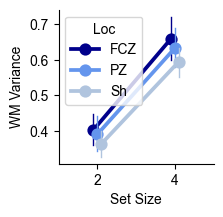

In [3]:
# plot
f = plt.figure()
f.set_size_inches(2, 2)
colors = ['darkblue', 'cornflowerblue', 'lightsteelblue']
sns.pointplot(data=wm_long, x='setsize', y='var', hue='Loc', errorbar=('ci', 68), dodge=0.1, palette=colors, err_kws={'linewidth': 1})
plt.ylabel('WM Variance')
plt.xlabel('Set Size')
plt.xticks([0, 1], ['2', '4'])
sns.despine()

plt.savefig('tdcs-wm.pdf', dpi=300, transparent=True, bbox_inches="tight")

In [4]:
# set size vs location repeated measures anova (frontal, parietal, sham)
aov = pg.rm_anova(dv='var', within=['setsize','Loc'], subject='SID', data=wm_long)
aov.round(5)

/Users/woonjupark/Documents/code/ptm-wm-sz/env/lib/python3.11/site-packages/pingouin/distribution.py:507: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  data.groupby(level=1, axis=1, observed=True, group_keys=False)
/Users/woonjupark/Documents/code/ptm-wm-sz/env/lib/python3.11/site-packages/pingouin/distribution.py:508: FutureWarning: DataFrameGroupBy.diff with axis=1 is deprecated and will be removed in a future version. Operate on the un-grouped DataFrame instead
  .diff(axis=1)


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,setsize,1.78892,1,19,1.78892,61.52234,0.00000,0.00000,0.24117,1.00000
1,Loc,0.05605,2,38,0.02803,1.26182,0.29473,0.29447,0.00986,0.98062
2,setsize * Loc,0.00316,2,38,0.00158,0.17029,0.84406,0.82889,0.00056,0.92915
